# Using Azure RESTful API from Command Line and SDK Demo

Note: 
For both demos,
- Please change the Form Recognizer endpoint URL
- Please change the Form Recognizer Subscription Key

## Install required libraries

In [1]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

zsh:1: command not found: activate


## Importing required Python modules

In [5]:
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

import os, time, uuid

Matplotlib is building the font cache; this may take a moment.


## Utility Function

In [7]:
def show_image_in_cell(img_url):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

In [6]:
## Sample Image

In [8]:
image_source = 'https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/receipt-1.png'

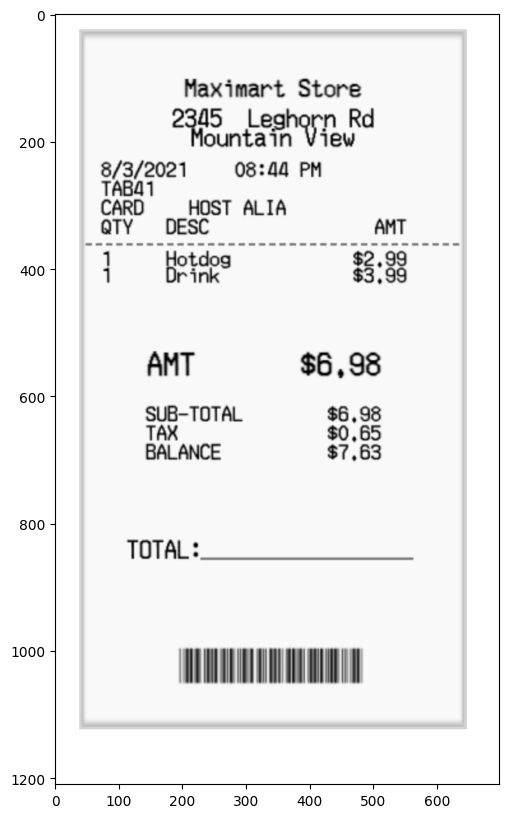

In [9]:
show_image_in_cell(image_source)

## RESTful API at Command line

### Please use the command below with proper information:
- ! curl -i 
    -  -X POST "https://htdung-document-intelligence.cognitiveservices.azure.com/" 
    - -H "Content-Type: application/json" 
    - -H "Ocp-Apim-Subscription-Key: DRQLIPxvpGhEJIaAdoIggHW4b4uGRvKIdz85sOy21UzyuYps3DcDJQQJ99AJACYeBjFXJ3w3AAALACOGWmxZ" 
    - --data-ascii "{ 'source': 'https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/receipt-1.png'}"
- Please note: Make sure you have "/formrecognizer/v2.1/prebuilt/receipt/analyze" at the end of your FORM RECOGNIZER API ENDPOINT URL in the "-X POST" part.
- An example is shown below:

$ curl -i -X POST "https://avkash-ua-form.cognitiveservices.azure.com/formrecognizer/v2.1/prebuilt/receipt/analyze" -H "Content-Type: application/json" -H "Ocp-Apim-Subscription-Key: 2bfd1219ae07461e84a0d489d57c0c4f" --data-ascii "{ 'source': 'https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/receipt-1.png'}"

In [10]:
!curl -i -X POST "https://htdung-document-intelligence.cognitiveservices.azure.com/formrecognizer/v2.1/prebuilt/receipt/analyze" -H "Content-Type: application/json" -H "Ocp-Apim-Subscription-Key: DRQLIPxvpGhEJIaAdoIggHW4b4uGRvKIdz85sOy21UzyuYps3DcDJQQJ99AJACYeBjFXJ3w3AAALACOGWmxZ" --data-ascii "{ 'source': 'https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/receipt-1.png'}"

HTTP/2 202 
content-length: 0
operation-location: https://htdung-document-intelligence.cognitiveservices.azure.com/formrecognizer/v2.1/prebuilt/receipt/analyzeResults/371e5d94-02b9-43db-9c47-062df1a0d51a
x-envoy-upstream-service-time: 190
azure-deprecating: API version 2.1 will retire on 2027-09-30. (https://aka.ms/Azure-Docuement-Intelligence-V2-retirement)
apim-request-id: 371e5d94-02b9-43db-9c47-062df1a0d51a
strict-transport-security: max-age=31536000; includeSubDomains; preload
x-content-type-options: nosniff
x-ms-region: East US
date: Sat, 26 Oct 2024 17:43:00 GMT



### Please use the command below with proper information
- ! curl 
   - -X GET "API ENDPOINT WITH RESULT UUID" 
   - -H "Ocp-Apim-Subscription-Key: YOUR SUBSCRIPTION KEY"
- The "API ENDPOINT WITH RESULT UUID" can be obtained from the "Operation-Location" part of the output of the last call. 

In [11]:
! curl -X GET "https://htdung-document-intelligence.cognitiveservices.azure.com/formrecognizer/v2.1/prebuilt/receipt/analyzeResults/364843d7-e930-4ec6-960c-ed5b3c320113" -H "Ocp-Apim-Subscription-Key: DRQLIPxvpGhEJIaAdoIggHW4b4uGRvKIdz85sOy21UzyuYps3DcDJQQJ99AJACYeBjFXJ3w3AAALACOGWmxZ"


{"status":"succeeded","createdDateTime":"2024-10-26T17:12:32Z","lastUpdatedDateTime":"2024-10-26T17:12:34Z","analyzeResult":{"version":"2.1.0","readResults":[{"page":1,"angle":0.2046,"width":698,"height":1210,"unit":"pixel"}],"documentResults":[{"docType":"prebuilt:receipt","pageRange":[1,1],"fields":{"Items":{"type":"array","valueArray":[{"type":"object","valueObject":{"Name":{"type":"string","valueString":"Hotdog","text":"Hotdog","boundingBox":[170,369,275,371,274,402,170,400],"page":1,"confidence":0.984},"TotalPrice":{"type":"number","valueNumber":2.99,"text":"$2.99","boundingBox":[462,371,550,372,550,397,463,396],"page":1,"confidence":0.986}}},{"type":"object","valueObject":{"Name":{"type":"string","valueString":"Drink","text":"Drink","boundingBox":[174,397,254,398,254,425,173,425],"page":1,"confidence":0.984},"TotalPrice":{"type":"number","valueNumber":3.99,"text":"$3.99","boundingBox":[465,395,549,397,548,424,464,422],"page":1,"confidence":0.98}}}]},"MerchantAddress":{"type":"str

## RESTful API at Command line with the output

**Command**:
!curl -i -X POST "https://htdung-document-intelligence.cognitiveservices.azure.com/formrecognizer/v2.1/prebuilt/receipt/analyze" -H "Content-Type: application/json" -H "Ocp-Apim-Subscription-Key: DRQLIPxvpGhEJIaAdoIggHW4b4uGRvKIdz85sOy21UzyuYps3DcDJQQJ99AJACYeBjFXJ3w3AAALACOGWmxZ" --data-ascii "{ 'source': 'https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/receipt-1.png'}"


**Output**: 
HTTP/1.1 202 Accepted
Content-Length: 0
Operation-Location: https://htdung-document-intelligence.cognitiveservices.azure.com/formrecognizer/v2.1/prebuilt/receipt/analyzeResults/364843d7-e930-4ec6-960c-ed5b3c320113
x-envoy-upstream-service-time: 161
azure-deprecating: API version 2.1 will retire on 2027-09-30. (https://aka.ms/Azure-Docuement-Intelligence-V2-retirement)
apim-request-id: 364843d7-e930-4ec6-960c-ed5b3c320113
Strict-Transport-Security: max-age=31536000; includeSubDomains; preload
x-content-type-options: nosniff
x-ms-region: East US
Date: Sat, 26 Oct 2024 17:12:32 GMT

## RESTful API at Command line with the output using the result ID


**Command**:
! curl -X GET "https://htdung-document-intelligence.cognitiveservices.azure.com/formrecognizer/v2.1/prebuilt/receipt/analyzeResults/364843d7-e930-4ec6-960c-ed5b3c320113" -H "Ocp-Apim-Subscription-Key: DRQLIPxvpGhEJIaAdoIggHW4b4uGRvKIdz85sOy21UzyuYps3DcDJQQJ99AJACYeBjFXJ3w3AAALACOGWmxZ"


**Output**: 
{"status":"succeeded","createdDateTime":"2024-10-26T17:12:32Z","lastUpdatedDateTime":"2024-10-26T17:12:34Z","analyzeResult":{"version":"2.1.0","readResults":[{"page":1,"angle":0.2046,"width":698,"height":1210,"unit":"pixel"}],"documentResults":[{"docType":"prebuilt:receipt","pageRange":[1,1],"fields":{"Items":{"type":"array","valueArray":[{"type":"object","valueObject":{"Name":{"type":"string","valueString":"Hotdog","text":"Hotdog","boundingBox":[170,369,275,371,274,402,170,400],"page":1,"confidence":0.984},"TotalPrice":{"type":"number","valueNumber":2.99,"text":"$2.99","boundingBox":[462,371,550,372,550,397,463,396],"page":1,"confidence":0.986}}},{"type":"object","valueObject":{"Name":{"type":"string","valueString":"Drink","text":"Drink","boundingBox":[174,397,254,398,254,425,173,425],"page":1,"confidence":0.984},"TotalPrice":{"type":"number","valueNumber":3.99,"text":"$3.99","boundingBox":[465,395,549,397,548,424,464,422],"page":1,"confidence":0.98}}}]},"MerchantAddress":{"type":"string","valueString":"2345 Leghorn Rd Mountain View","text":"2345 Leghorn Rd Mountain View","boundingBox":[182,144,499,146,498.6,214.2,181.6,212.2],"page":1,"confidence":0.961},"MerchantName":{"type":"string","valueString":"Maximart Store","text":"Maximart Store","boundingBox":[200.4,96.4,476,99.2,475.7,134.8,200,132],"page":1,"confidence":0.973},"ReceiptType":{"type":"string","valueString":"Itemized","confidence":0.995},"Subtotal":{"type":"number","valueNumber":6.98,"text":"$6.98","boundingBox":[424,614,511,615,509,643,424,643],"page":1,"confidence":0.984},"Tax":{"type":"number","valueNumber":0.65,"text":"$0.65","boundingBox":[425,643,511,644,511,673,424,672],"page":1,"confidence":0.987},"Total":{"type":"number","valueNumber":698,"text":"$6,98","boundingBox":[382,530,505,529,505,571,382,570],"page":1,"confidence":0.812},"TransactionDate":{"type":"date","valueDate":"2021-08-03","text":"8/3/2021","boundingBox":[69,227,208,228,207,260,69,260],"page":1,"confidence":0.989},"TransactionTime":{"type":"time","valueTime":"20:44:00","text":"08:44 PM","boundingBox":[278.8,228.8,414,228,414.2,258.2,279,259],"page":1,"confidence":0.988}}}]}}

## Using Python SDK to extract the text from the receipt (Similar to RESTful API at Command line)

In [12]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import FormRecognizerClient

ModuleNotFoundError: No module named 'azure'

In [22]:
AZURE_FORM_RECOGNIZER_ENDPOINT = "https://htdung-document-intelligence.cognitiveservices.azure.com"
AZURE_FORM_RECOGNIZER_KEY = "DRQLIPxvpGhEJIaAdoIggHW4b4uGRvKIdz85sOy21UzyuYps3DcDJQQJ99AJACYeBjFXJ3w3AAALACOGWmxZ"

endpoint = AZURE_FORM_RECOGNIZER_ENDPOINT
key = AZURE_FORM_RECOGNIZER_KEY
form_recognizer_client = FormRecognizerClient(endpoint=endpoint, credential=AzureKeyCredential(key))

In [23]:
content_url = "https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/receipt-1.png"
receipt_content_from_url = form_recognizer_client.begin_recognize_receipts_from_url(content_url)

collected_receipts = receipt_content_from_url.result()


In [24]:
collected_receipts

[RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=Hotdog, bounding_box=[Point(x=170.0, y=369.0), Point(x=275.0, y=371.0), Point(x=274.0, y=402.0), Point(x=170.0, y=400.0)], field_elements=None), name=Name, value='Hotdog', confidence=0.984), 'TotalPrice': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=$2.99, bounding_box=[Point(x=462.0, y=371.0), Point(x=550.0, y=372.0), Point(x=550.0, y=397.0), Point(x=463.0, y=396.0)], field_elements=None), name=TotalPrice, value=2.99, confidence=0.986)}, confidence=1.0), FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, t